# K-Nearest Neighbors (KNN) Algorithm from Scratch

In this notebook, we will implement the KNN algorithm from scratch. We will walk through loading the dataset, preprocessing the data, implementing the KNN algorithm, evaluating the model, and visualizing the results.


In [23]:
import numpy as np
import random
import math
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

Dataset Exploration

In [24]:
# Importing necessary libraries for exploration
import pandas as pd

# Convert the Iris dataset into a pandas DataFrame for better understanding
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['Species'] = iris['target']
df['Species'] = df['Species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Show basic statistics of the dataset
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Visualizing Feature Distributions

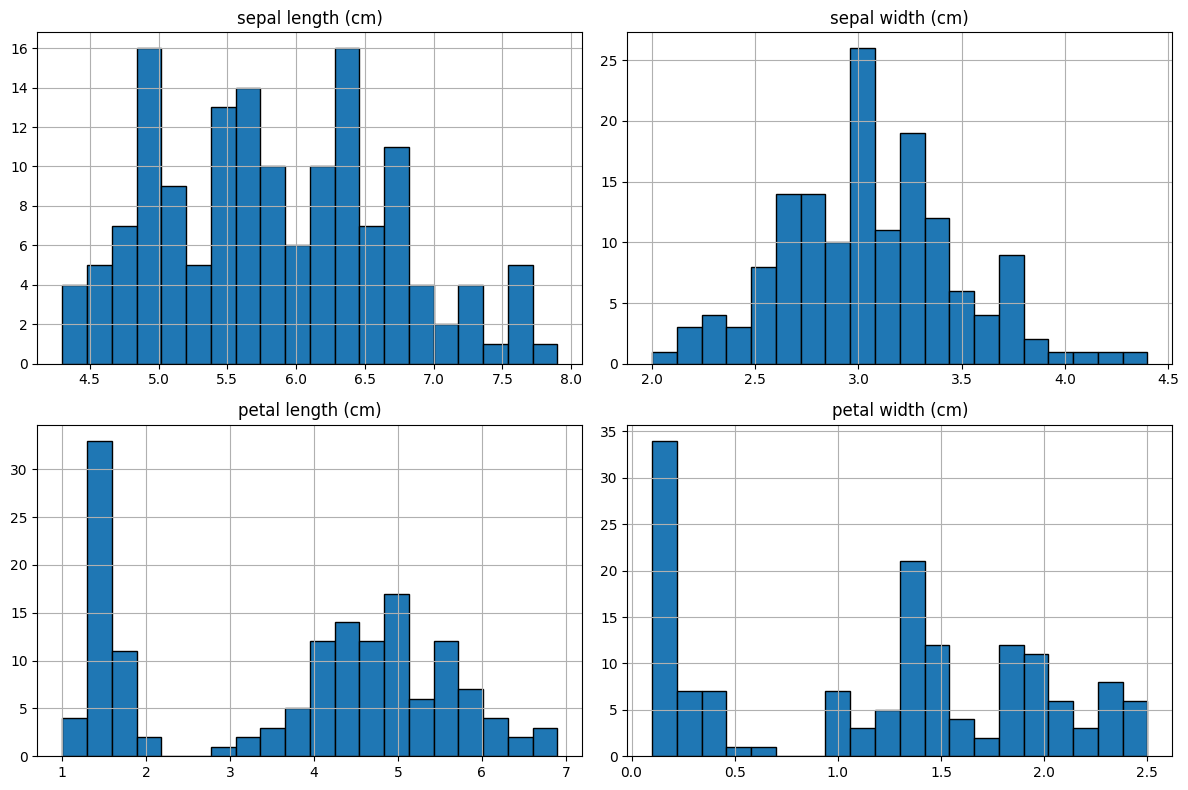

In [25]:
# Visualizing feature distributions using histograms
df[iris['feature_names']].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.tight_layout()
plt.show()


Pairplot for Feature Relationships

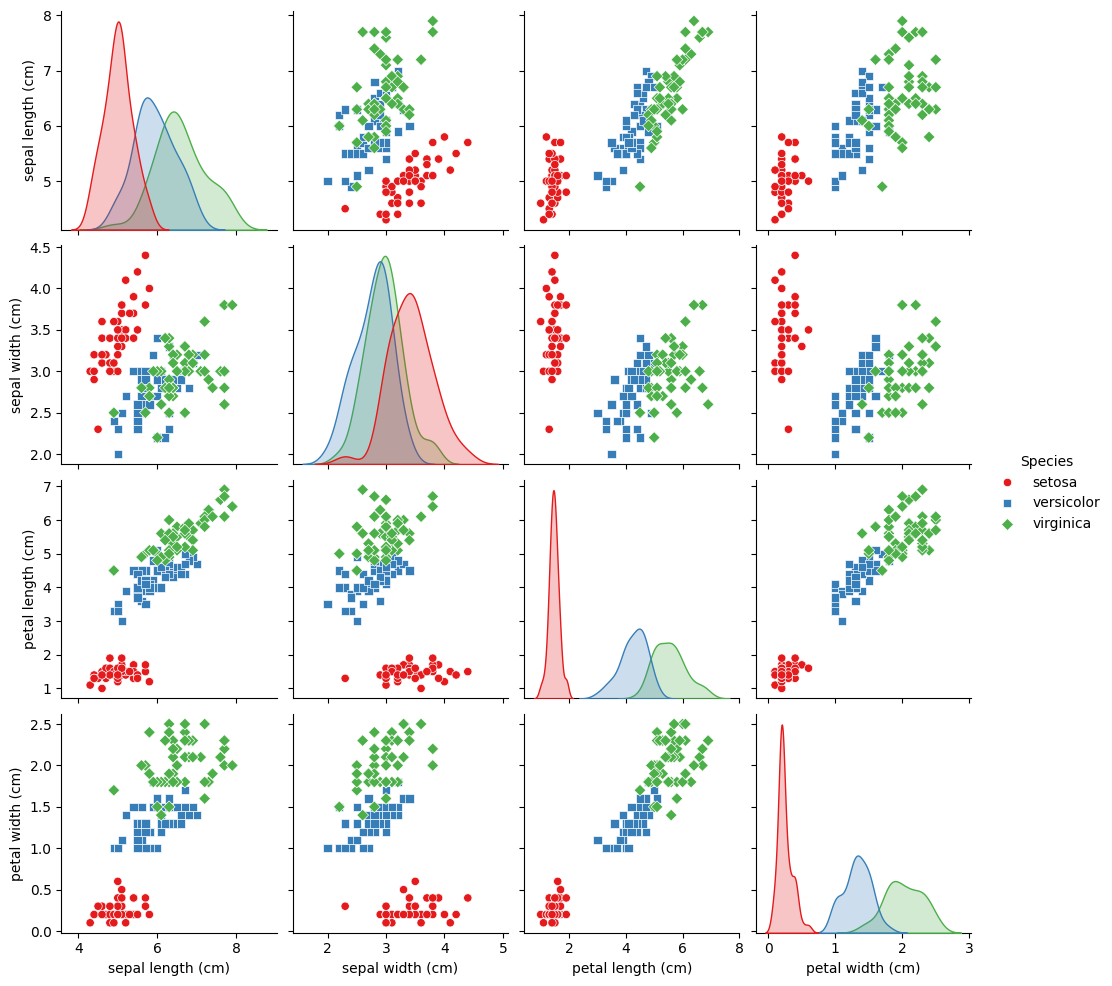

In [26]:
# Visualizing pairwise relationships between features using seaborn's pairplot
import seaborn as sns

sns.pairplot(df, hue="Species", palette="Set1", markers=["o", "s", "D"])
plt.show()


Feature Correlation Heatmap

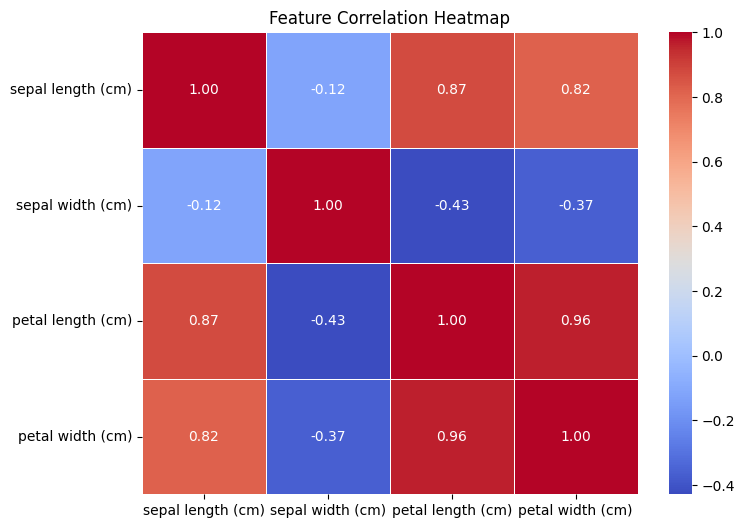

In [27]:
# Visualizing the correlation matrix using seaborn heatmap
corr = df[iris['feature_names']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


Class Distribution

/tmp/ipykernel_26817/104652592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Species', palette="Set1")


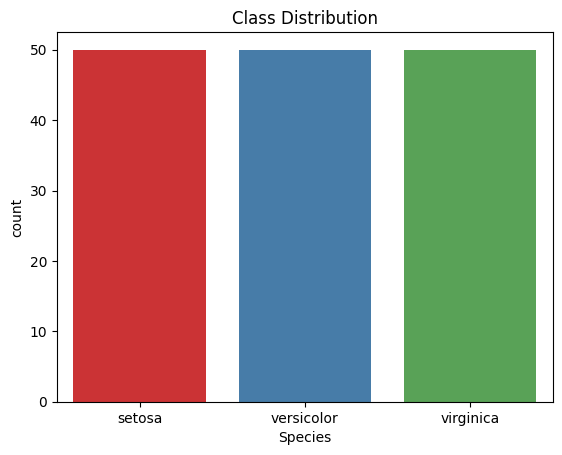

In [28]:
# Visualizing the class distribution
sns.countplot(data=df, x='Species', palette="Set1")
plt.title('Class Distribution')
plt.show()


Visualizing Data in 2D and 3D Space

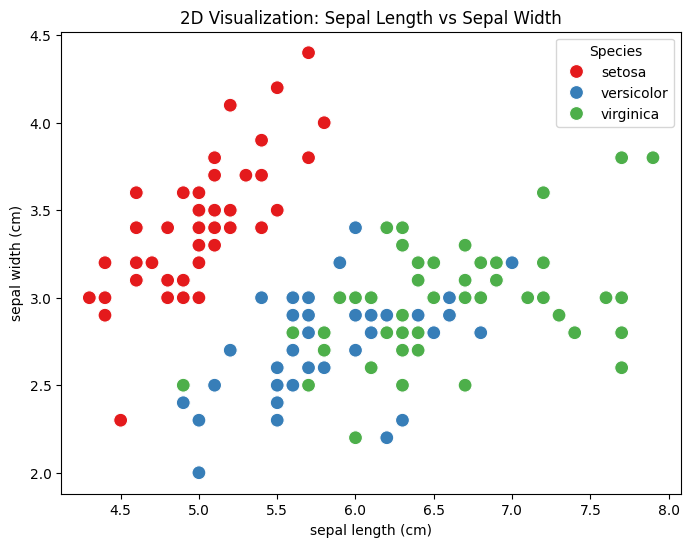

In [29]:
# 2D scatter plot of the first two features: sepal length and sepal width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=iris['feature_names'][0], y=iris['feature_names'][1], hue="Species", palette="Set1", s=100)
plt.title('2D Visualization: Sepal Length vs Sepal Width')
plt.show()


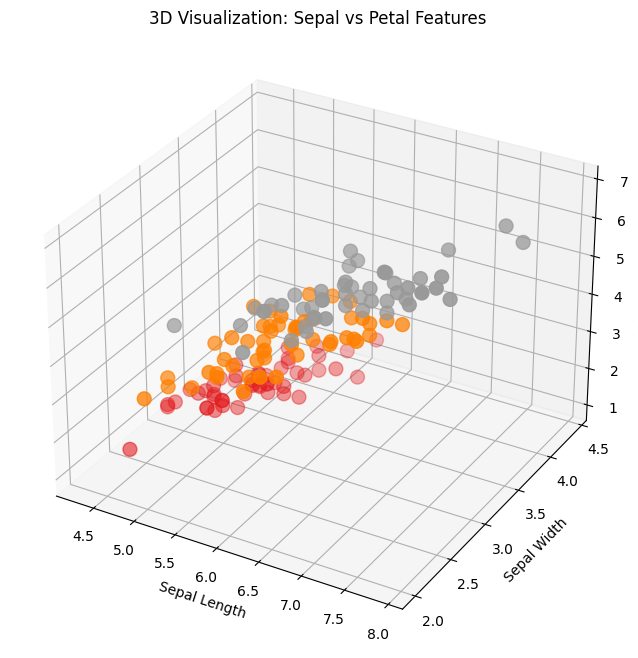

In [30]:
# 3D scatter plot of the first three features
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[iris['feature_names'][0]], df[iris['feature_names'][1]], df[iris['feature_names'][2]], c=df['Species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}), cmap='Set1', s=100)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Visualization: Sepal vs Petal Features')
plt.show()


Dataset Loading

In [32]:
# Load Iris dataset using sklearn
def loadDataset():
    iris = load_iris()
    data = iris['data']
    target = iris['target']
    target_names = iris['target_names']
    dataset = []

    for i in range(len(data)):
        dataset.append(list(data[i]) + [target[i]])

    return dataset, target_names

In [33]:
# Preprocess dataset: Split and scale
def handleDataset(dataset, split=0.67):
    trainingSet = []
    testSet = []
    
    for row in dataset:
        for i in range(4):  # Ensuring all feature values are float
            row[i] = float(row[i])
        if random.random() < split:
            trainingSet.append(row)
        else:
            testSet.append(row)
    
    X_train = [row[:-1] for row in trainingSet]
    y_train = [row[-1] for row in trainingSet]
    X_test = [row[:-1] for row in testSet]
    y_test = [row[-1] for row in testSet]
    
    # Normalize features using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, y_train, X_test, y_test

In [34]:
# Load and preprocess dataset
dataset, target_names = loadDataset()
X_train, y_train, X_test, y_test = handleDataset(dataset)

KNN Algorithm Functions

In [35]:
# Compute Euclidean Distance
def euclideanDistance(instance1, instance2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(instance1, instance2)))


In [36]:
# Find k-nearest neighbors
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x][0])
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))  # Sort by distance
    neighbors = [distances[i][0] for i in range(k)]
    return neighbors

In [37]:
# Predict the class of a test instance
def getResponse(neighbors):
    classVotes = {}
    for neighbor in neighbors:
        response = neighbor[-1]
        classVotes[response] = classVotes.get(response, 0) + 1  # Count occurrences
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

Evaluation and Metrics

In [38]:
# Calculate accuracy of predictions
def getAccuracy(testSet, predictions):
    correct = sum([1 for i in range(len(testSet)) if testSet[i][-1] == predictions[i]])
    return (correct / float(len(testSet))) * 100.0

In [39]:
# Visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

In [40]:
# Visualize decision boundary for the first two features
def plot_decision_boundary(X, y, model, classes, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # Predict the class labels for each point in the mesh grid
    Z = np.array([model([xx[i][j], yy[i][j]]) for i in range(xx.shape[0]) for j in range(yy.shape[1])])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

Making Predictions and Visualizing Results

In [41]:
# Set k-value for KNN
k = 3
predictions = []


In [42]:
# Make predictions using KNN
for i in range(len(X_test)):
    neighbors = getNeighbors(list(zip(X_train, y_train)), X_test[i], k)
    result = getResponse(neighbors)
    predictions.append(result)

In [43]:
# Calculate and display accuracy
accuracy = getAccuracy(list(zip(X_test, y_test)), predictions)
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 97.37%


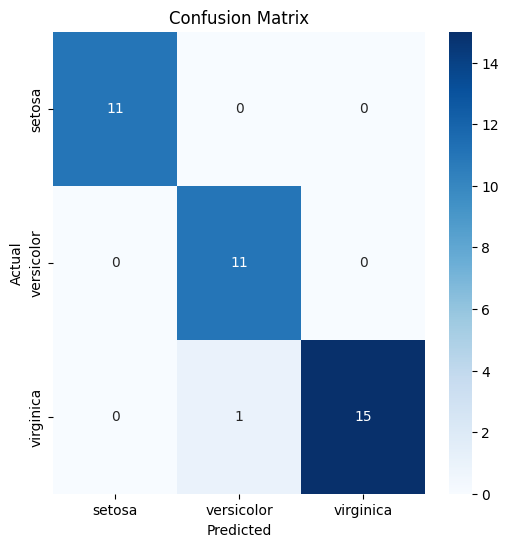

In [44]:
# Plot confusion matrix
plot_confusion_matrix(y_test, predictions, classes=target_names)

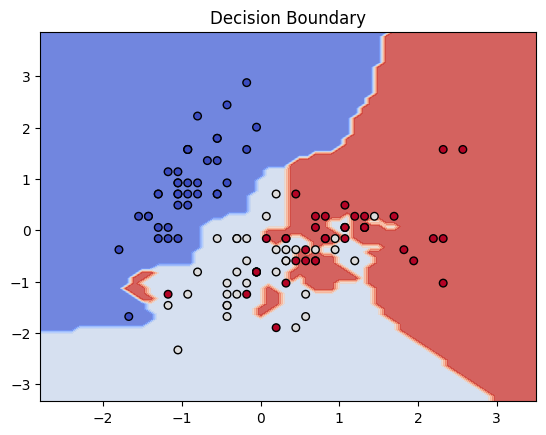

In [45]:
# Visualize decision boundaries for the first two features
plot_decision_boundary(X_train[:, :2], y_train, lambda x: getResponse(getNeighbors(list(zip(X_train, y_train)), x, k)), classes=target_names)